In [1]:
from datasets import get_japanese_vowels, get_spoken_digits, pre_process
import utils
from visualization import save_plot

import numpy as np
import seaborn as sns
import pandas as pd

import os

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from scipy.io.wavfile import read
from scipy.stats import mode

from sklearn.manifold import TSNE

In [2]:
X_train_vowels, y_train_vowels, X_test_vowels, y_test_vowels = get_japanese_vowels()
X_train_digits, y_train_digits, X_test_digits, y_test_digits = get_spoken_digits()

In [3]:
COLOR_PALETTE = ["#800000", "#9A6324", "#e6194B", "#f58231", "#ffe119", "#bfef45", 
                 "#3cb44b", "#42d4f4", "#4363d8", "#000075", "#911eb4", "#f032e6"]

In [4]:
def plot_recording(ax, rec_data, title=None):
    [ax.plot(x, color=COLOR_PALETTE[i]) for i, x in enumerate(rec_data)]
    ax.set_xlim(0, 22)
    ax.set_ylim(-1.5, 2)
    if title:
        ax.title.set_text("$\it{" + title + "}$")

In [5]:
def add_axis_labels(fig):
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel("Timestep")
    plt.ylabel("Amplitude")

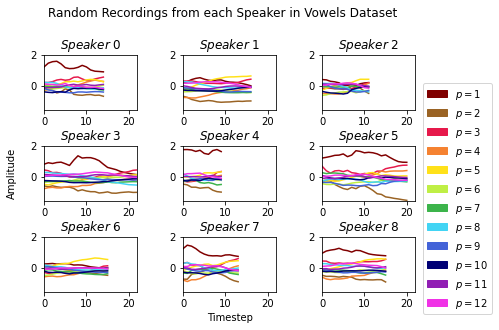

In [6]:
def show_random_points(X):
    utils.seed()
    fig, ax = plt.subplots(nrows=3, ncols=3)
    fig.tight_layout(pad=1.5)

    max_range = 30
    min_range = 0
    count = 0

    for row in ax:
        for col in row:
            random_point = np.random.randint(min_range, max_range)
            min_range += 30
            max_range += 30
            plot_recording(col, X[random_point].T, title="Speaker \;" + str(count))
            count += 1

    utils.seed()
    add_axis_labels(fig)
    fig.suptitle("Random Recordings from each Speaker in Vowels Dataset", y=1.1)
    patches = [mpatches.Patch(color=c, label="$\it{p=}$" + str(i + 1)) for i, c in enumerate(COLOR_PALETTE)]
    plt.legend(handles=patches, bbox_to_anchor=(1.22, 0.9))
    save_plot("rand_speakers_vowels")
    plt.show()

show_random_points(X_train_vowels)

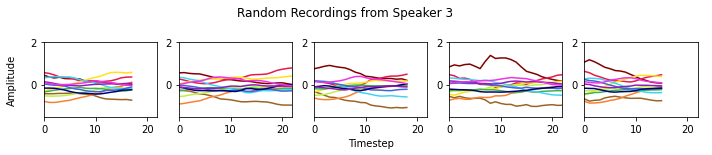

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 2))
speaker = 3

for i, col in enumerate(ax):
    plot_recording(col, X_train_vowels[np.random.randint(speaker * 30, (speaker * 30) + 30)].T)

utils.seed()
add_axis_labels(fig)
fig.suptitle("Random Recordings from Speaker " + str(speaker), y=1.1)
fig.tight_layout(pad=0)
save_plot("speaker_" + str(speaker))
plt.show()

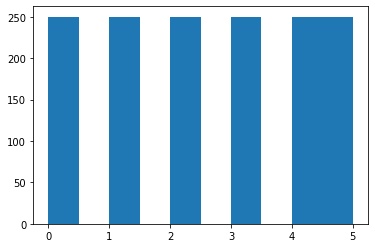

(array([250.,   0., 250.,   0., 250.,   0., 250.,   0., 250., 250.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

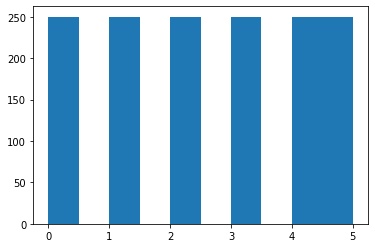

In [8]:
plt.hist(y_train_digits)
plt.show()
plt.hist(y_train_digits)

Min length: 7 Max length: 26 Mean: 15.829629629629629 ModeResult(mode=15, count=41) Median:  15.0
Min length: 7 Max length: 29 Mean: 15.37027027027027 ModeResult(mode=14, count=45) Median:  15.0


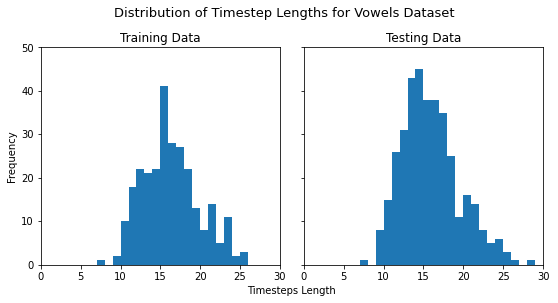

Min length: 9 Max length: 152 Mean: 28.584666666666667 ModeResult(mode=27, count=91) Median:  27.0
Min length: 9 Max length: 146 Mean: 28.730666666666668 ModeResult(mode=28, count=80) Median:  27.5


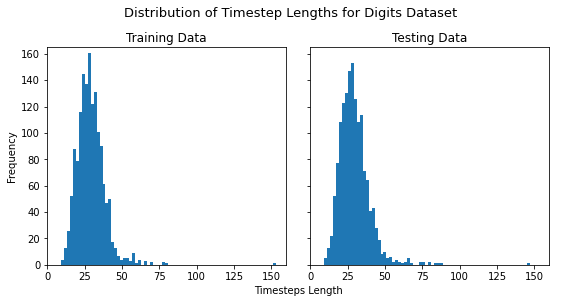

In [9]:
def plot_rec_len_freq(data_ls, ax, title="", binwidth=1, xmax=30, 
                      xlab=None, ylim=50):
    lens = [x.shape[0] for x in data_ls]
    min_, max_ = min(lens), max(lens)
    print("Min length:", min_, "Max length:", max_, "Mean:", 
          np.mean(lens), mode(lens, keepdims=False), "Median: ", np.median(lens))
    ax.hist(lens, bins=np.arange(np.min(lens), np.max(lens) + binwidth, binwidth))
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ylim)
    if xlab:
        ax.set_xlabel(xlab)
    ax.set_ylabel("Frequency")
    ax.set_title(title)
    
def plot_train_test_dis(X_train, X_test, vowels=True, xmax=30, binwidth=1, ylim=50):
    name_ = "vowels" if vowels else "digits"
    fig = plt.figure(figsize=(9, 4))
    gs = fig.add_gridspec(1, 2, hspace=0, wspace=0.1)
    (ax1, ax2) = gs.subplots(sharey=True)
    fig.suptitle("Distribution of Timestep Lengths for " + name_.title() + " Dataset", y=1.02, fontsize=13)

    plot_rec_len_freq(X_train, ax1, title="Training Data", xmax=xmax, binwidth=binwidth, ylim=ylim)
    plot_rec_len_freq(X_test, ax2, title="Testing Data", xmax=xmax, binwidth=binwidth, ylim=ylim)
    #plt.setp(ax1.get_xticklabels()[-1], visible=False)
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel("Timesteps Length")
    ax2.set_ylabel("")

    save_plot(name_ + "_lengths")
    plt.show()

# fig, ax = plt.subplots(1, 1)
# fig.suptitle("Distribution of Timestep Lengths for Digits Dataset", fontsize=13)
# plot_rec_len_freq(X_digits, ax, xmax=160, binwidth=2, ylim=350, xlab="Timesteps Length")
# save_plot("digits_lengths")

plot_train_test_dis(X_train_vowels, X_test_vowels)
plot_train_test_dis(X_train_digits, X_test_digits, vowels=False, xmax=160, binwidth=2, ylim=165)

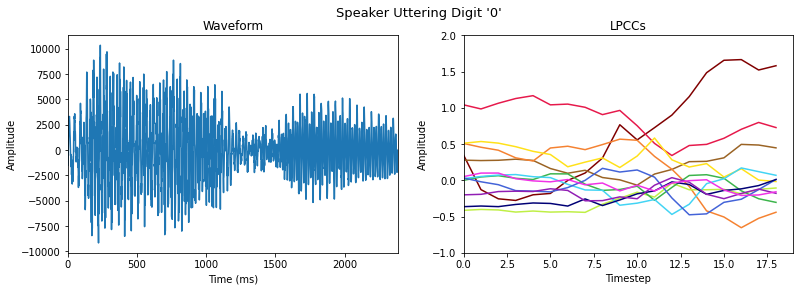

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

a = read(os.path.join("spoken_digits", "wav_digits", "0_george_0.wav"))[1]

X = np.genfromtxt(os.path.join("spoken_digits", "txt_lpccs", "0_george_0_lpcc.txt"), delimiter=',')

ax1.plot(a)
ax1.set_xlim(0, len(a))
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Amplitude")
ax1.set_title("Waveform")

plot_recording(ax2, X.T)
ax2.set_xlim(0, len(X))
ax2.set_ylim(-1, 2.0)
ax2.set_xlabel("Timestep")
ax2.set_ylabel("Amplitude")
ax2.set_title("LPCCs")

fig.suptitle("Speaker Uttering Digit '0'", fontsize=13)
save_plot("digits_wav")
plt.show()

In [11]:
X_train_vowels_uni_longer = utils.uniform_scaling(X_train_vowels, 30)
X_train_vowels_uni_15 = utils.uniform_scaling(X_train_vowels, 15)

In [12]:
def plot_single(ax, X, title):
    [ax.plot(x, color=COLOR_PALETTE[i]) for i, x in enumerate(X.T)]
    ax.set_xlim(-1, 30)
    ax.set_xticks(range(0, 35, 5))
    ax.set_title(title)

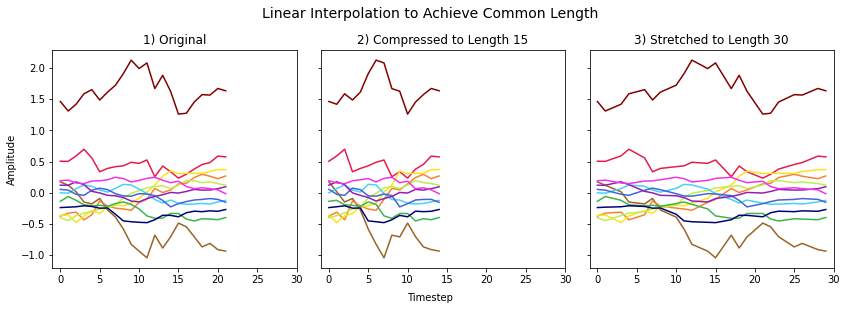

In [13]:
fig = plt.figure(figsize=(14, 4))
gs = fig.add_gridspec(1, 3, hspace=0, wspace=0.1)
(ax1, ax2, ax3) = gs.subplots(sharex=True, sharey=True)

idx = 2

plot_single(ax1, X_train_vowels[idx], "1) Original")
ax1.set_ylabel("Amplitude")
plot_single(ax2, X_train_vowels_uni_15[idx], "2) Compressed to Length 15")
plot_single(ax3, X_train_vowels_uni_longer[idx], "3) Stretched to Length 30")
fig.text(0.5, 0.01, 'Timestep', ha='center')
fig.suptitle("Linear Interpolation to Achieve Common Length", fontsize=14, y=1.03)
save_plot("uniform_length")

22


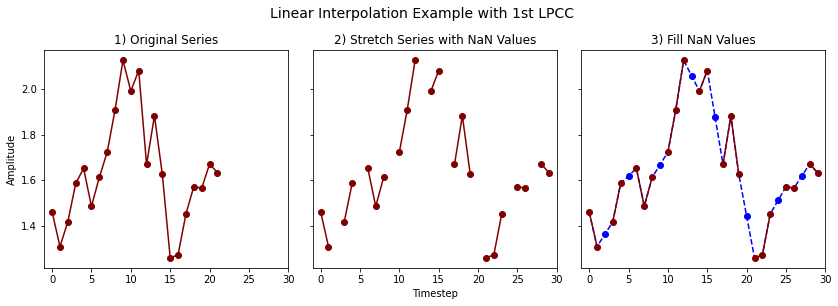

In [14]:
fig = plt.figure(figsize=(14, 4))
gs = fig.add_gridspec(1, 3, hspace=0, wspace=0.1)
(ax1, ax2, ax3) = gs.subplots(sharex=True, sharey=True)

color=COLOR_PALETTE[0]

def stretch(rec, new_len):
    rec = rec.T
    current_len = rec.shape[1]

    new_rec = np.zeros((12, new_len))
    new_rec.fill(np.nan)

    idxs = np.linspace(0, new_len - 1, current_len).round().astype(int)    
    
    cmp = set(range(0, new_len))
    ms = list(cmp.difference(set(idxs)))

    for i in range(1):
        new_rec[i, idxs] = rec[i, :] # copy values
        
        ax2.scatter(range(len(new_rec[i])), new_rec[i], color=color)
        ax2.plot(new_rec[i], color=color)
        
        ax3.scatter(range(len(new_rec[i])), new_rec[i], color=color)
        ax3.plot(new_rec[i], color=color)
        
        
        new_rec[i, :] = pd.Series(new_rec[i, :]).interpolate(method="linear") # fill-in nan values
        
        
        ax3.plot(new_rec[i], zorder=0, color="blue", linestyle="dashed")
        ax3.scatter(ms, new_rec[i, ms], color="blue", zorder=1)
        

    return new_rec.T

idx = 2
rec = X_train_vowels[idx]
new_len = 30
new_rec = stretch(rec, new_len)

print(len(rec.T[0]))
ax1.plot(rec.T[0], color=color)
ax1.scatter(range(len(rec.T[0])), rec.T[0], color=color)
ax1.set_xlim(-1, new_len)

ax2.set_xlabel("Timestep")
ax1.set_ylabel("Amplitude")
ax1.set_title("1) Original Series")
ax2.set_title("2) Stretch Series with NaN Values")
ax3.set_title("3) Fill NaN Values")

fig.suptitle("Linear Interpolation Example with 1st LPCC", y=1.03, fontsize=14)
save_plot("interpolation_example")
plt.show()

In [15]:
def plot_tsne(x, y, lim=24, title="", vowels=False):
    palette = dict(zip(np.arange(0, 9), sns.color_palette(n_colors=9)))
    tsne = TSNE(n_components=2, init='random', random_state=utils.RANDOM_STATE, learning_rate='auto')
    X_tsne = tsne.fit_transform(x)
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette=palette)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Speaker")
    plt.title(title)
    name_ = "vowels" if vowels else "digits"
    save_plot("tsne_" + name_)
    plt.show()
    
def extract_f(x, y, lim=24, title="", vowels=False):
    rec_len = 3
    x_uni = utils. uniform_scaling(x, rec_len)
    x_feat = utils.extract_features(x_uni)
    plot_tsne(x_feat, y, lim, title, vowels)

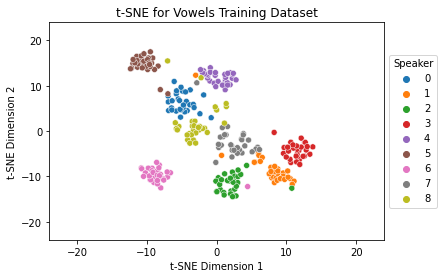

In [16]:
extract_f(X_train_vowels, y_train_vowels, title="t-SNE for Vowels Training Dataset", vowels=True)

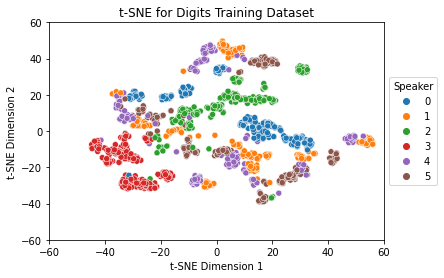

In [18]:
extract_f(X_train_digits, y_train_digits, lim=60, title="t-SNE for Digits Training Dataset")